In [2]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import math
    import datetime as dt
    from scipy.signal import savgol_filter
    from sklearn.decomposition import PCA as pca
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.feature_selection import mutual_info_regression, SelectKBest, SelectPercentile, mutual_info_classif, chi2
    %matplotlib inline

In [3]:
#abrindo a base de dados
base = pd.read_excel('A_dados.xlsx',sheet_name='celluclast')


In [64]:
#base de dados contendo todos os dados
dados= pd.read_excel('A_dados.xlsx',sheet_name='todos')
dados_back = dados.copy()

In [166]:
dados = dados_back.copy()

In [4]:
dados = dados[(dados['experimento'] == 'cell1')]

In [3]:
#base de dados contendo todos os dados
#dados = pd.read_excel('A_dados.xlsx',sheet_name='celluclast')
dados = dados[(dados['eenz'] == 'celluclast')]

In [4]:

dados = dados[(dados['eenz'] == 'eeta')]

In [167]:
#Separar somente as amostras que contenham todas as atividades enzimáticas
dados = dados.loc[(dados['betaglicosidase'].notnull()) 
                         & (dados['cmcase'].notnull()) 
                         & (dados['fpase'].notnull())
                         &(dados['xilanase'].notnull())]
resultados = '\nTotal geral de amostras com todas as atividades enzimáticas:'+str(dados.shape[0])


In [5]:
#Separar somente as amostras que contenham todas as atividades enzimáticas
dados = dados.loc[(dados['betaglicosidase'].notnull())]

In [6]:
var_ae=['betaglicosidase','cmcase','fpase','xilanase']
#criando vetores com os nomes dos atributos

var_abs_int = np.arange(1100,2496,2)
var_abs_txt=[]
for valor in var_abs_int:
    var_abs_txt += [str(valor)+'nm']

In [168]:
var_ae=['betaglicosidase','cmcase','fpase','xilanase']
#criando vetores com os nomes dos atributos

var_abs_int = np.arange(1100,1875,2)
var_abs_txt=[]
for valor in var_abs_int:
    var_abs_txt += [str(valor)+'nm']

In [7]:
#lista de dados sem cel0 e cel2
dados_parc = dados[ (dados['experimento'] != 'cell0') & (dados['experimento'] != 'cell2')]

In [8]:
len(dados)

33

In [68]:
#Resetando o índice dos dados:
dados.reset_index(drop=True)

,descricao,1100nm,1102nm,1104nm,1106nm,1108nm,1110nm,1112nm,1114nm,1116nm,...,cmcase,fpase,xilanase,proteinas,eenz,temp,dur,inter,proc,experimento
0,exp2_p0_t1,0.033690,0.034025,0.034302,0.034534,0.034730,0.034908,0.035092,0.035302,0.035555,...,114.800334,50.343581,575.548990,113.040397,celluclast,70,30,0,des,cell2
1,exp2_p0_t2,0.034158,0.033989,0.033937,0.034027,0.034259,0.034608,0.035037,0.035511,0.036002,...,114.800334,50.343581,575.548990,113.040397,celluclast,70,30,0,des,cell2
2,exp2_p0_t3,0.033267,0.033650,0.033960,0.034240,0.034516,0.034807,0.035128,0.035488,0.035893,...,114.800334,50.343581,575.548990,113.040397,celluclast,70,30,0,des,cell2
3,exp2_p1_t1_1,0.033680,0.033531,0.033564,0.033741,0.034018,0.034357,0.034727,0.035112,0.035514,...,90.505314,57.640572,484.137960,68.981810,celluclast,70,30,5,des,cell2
4,exp2_p1_t1_2,0.033632,0.033577,0.033613,0.033735,0.033932,0.034204,0.034556,0.034982,0.035460,...,90.505314,57.640572,484.137960,68.981810,celluclast,70,30,5,des,cell2
5,exp2_p1_t1_3,0.034668,0.034485,0.034311,0.034192,0.034178,0.034304,0.034575,0.034971,0.035452,...,90.505314,57.640572,484.137960,68.981810,celluclast,70,30,5,des,cell2
6,exp2_p1_t2_1,0.035393,0.035011,0.034840,0.034836,0.034958,0.035177,0.035466,0.035799,0.036158,...,83.547718,47.246602,469.732210,80.911883,celluclast,70,30,5,des,cell2
7,exp2_p1_t2_2,0.034025,0.034218,0.034455,0.034724,0.035004,0.035281,0.035561,0.035862,0.036206,...,83.547718,47.246602,469.732210,80.911883,celluclast,70,30,5,des,cell2
8,exp2_p1_t2_3,0.035157,0.035159,0.035308,0.035566,0.035878,0.036201,0.036509,0.036791,0.037054,...,83.547718,47.246602,469.732210,80.911883,celluclast,70,30,5,des,cell2
9,exp2_p1_t3_1,0.034457,0.034340,0.034384,0.034555,0.034811,0.035116,0.035449,0.035804,0.036176,...,79.786091,40.953654,410.537675,81.384361,celluclast,70,30,5,des,cell2


In [ ]:
dados = dados.loc[dados['experimento'] == 'ctedil1']

In [8]:
dados =  dados_parc.copy()

In [169]:
#Definindo os dataFrames iniciais para começar o processamento
df_x = dados.loc[:,var_abs_txt] #absorbâncias
df_y = dados.loc[:,var_ae]#AE
#df = dados.loc[:,var_abs_txt+var_ae]

In [170]:
# Imprime o tamanho das bases geradas
print(df_x.shape, df_y.shape)

(923, 388) (923, 4)


In [8]:
df_x = dados.loc[:,var_abs_txt] #absorbâncias
df_y = dados.loc[:,[['betaglicosidase']]#AE


In [171]:
#separando o conjunto de dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df_x,df_y,test_size=0.25, random_state=0)

# Imprime o tamanho das bases geradas
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)
    

(692, 388) (231, 388) (692, 4) (231, 4)


In [12]:
print('Dados de treino',x_treino.shape)
print('Dados de teste',x_teste.shape)

Dados de treino (23, 698)
Dados de teste (10, 698)


# seleção de variáveis: método: mutua info regression

**Relação entre as variáveis e a variável alvo**:
>Se X e Y são independentes, então nenhuma informação sobre Y pode ser obtida conhecendo X ou vice-versa.
Portanto sua informação mútua é 0.
>Se X é uma função determinística de Y, então podemos determinar X de Y e Y de X com informação mútua 1.
Quanto menor o valor, menos a variavel descreve a relação com o alvo.
>>**OBS:** A vantagem de usar informações mútuas sobre o F-Test é que ele se dá bem com a relação não linear entre as variáveis de recursos e de Target.

In [173]:
var_ae=['betaglicosidase','cmcase','fpase','xilanase']
sel_mi={}
for valor in var_ae:
    sel_mi[valor] = mutual_info_regression(x_treino,y_treino.loc[:,valor])

In [3]:
sel_mi_graph = {}
for valor in var_ae:
    sel_mi_graph[valor] = pd.Series(sel_mi[valor])


NameError: name 'var_ae' is not defined

In [175]:
for valor in var_ae:
    sel_mi_graph[valor].index = x_treino.columns
    sel_mi_graph[valor] = sel_mi_graph[valor].sort_values(ascending=False)


In [ ]:
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
cores = list(colors.keys())

In [2]:

print('beta:')
sel_mi_graph[var_ae[0]][:10].plot.bar(figsize=(22,10),color=cores[30:40])
print('--------------------------------------')

beta:


NameError: name 'sel_mi_graph' is not defined

In [76]:
beta_as50mais=sel_mi_graph[var_ae[0]][:50].index
beta_as50mais

Index(['1108nm', '1106nm', '1112nm', '1110nm', '1114nm', '1116nm', '1104nm',
       '1126nm', '1102nm', '1124nm', '1424nm', '1426nm', '1422nm', '1428nm',
       '1118nm', '1122nm', '1100nm', '1420nm', '1352nm', '1822nm', '1120nm',
       '1514nm', '2046nm', '1512nm', '1776nm', '1648nm', '1150nm', '1350nm',
       '1664nm', '1798nm', '1778nm', '1824nm', '1138nm', '1800nm', '1128nm',
       '1818nm', '1650nm', '1774nm', '1148nm', '1142nm', '2044nm', '1152nm',
       '1646nm', '1690nm', '1146nm', '1820nm', '1188nm', '1144nm', '1666nm',
       '1348nm'],
      dtype='object')

In [77]:
cmcase_as50mais=sel_mi_graph[var_ae[1]][:50].index
cmcase_as50mais

Index(['1112nm', '1422nm', '1786nm', '1102nm', '1110nm', '1100nm', '1666nm',
       '1114nm', '1672nm', '1108nm', '1788nm', '1424nm', '1790nm', '1668nm',
       '1142nm', '1144nm', '1106nm', '1420nm', '1792nm', '1150nm', '1502nm',
       '1662nm', '1146nm', '1794nm', '1664nm', '1116nm', '1670nm', '1798nm',
       '1352nm', '1674nm', '1796nm', '1364nm', '1500nm', '1104nm', '1360nm',
       '1660nm', '1356nm', '1362nm', '1496nm', '1498nm', '1124nm', '1416nm',
       '1358nm', '1354nm', '1504nm', '1494nm', '1152nm', '1136nm', '1784nm',
       '1148nm'],
      dtype='object')

In [21]:
fpase_as50mais=sel_mi_graph[var_ae[2]][:50].index
fpase_as50mais

Index(['1668nm', '1420nm', '1422nm', '1666nm', '1626nm', '1418nm', '1664nm',
       '1424nm', '1628nm', '1624nm', '1670nm', '1630nm', '1480nm', '1632nm',
       '1662nm', '1108nm', '1114nm', '1140nm', '1482nm', '1622nm', '1478nm',
       '1110nm', '1102nm', '1672nm', '1106nm', '1660nm', '1650nm', '1784nm',
       '1416nm', '1788nm', '1634nm', '1112nm', '1796nm', '1138nm', '1786nm',
       '1116nm', '1488nm', '1612nm', '1790nm', '1800nm', '1142nm', '1694nm',
       '1510nm', '1476nm', '1646nm', '1484nm', '1648nm', '1354nm', '1798nm',
       '1614nm'],
      dtype='object')

In [22]:
xil_as50mais=sel_mi_graph[var_ae[3]][:50].index
xil_as50mais

Index(['1664nm', '1668nm', '1666nm', '1662nm', '1660nm', '1670nm', '1422nm',
       '1352nm', '1658nm', '1500nm', '1498nm', '1420nm', '1354nm', '1416nm',
       '1496nm', '1112nm', '1516nm', '1656nm', '1468nm', '1672nm', '1504nm',
       '1484nm', '1502nm', '1482nm', '1350nm', '1418nm', '1356nm', '1474nm',
       '1492nm', '1466nm', '1494nm', '1114nm', '1412nm', '2178nm', '1424nm',
       '1472nm', '1506nm', '1568nm', '1726nm', '1788nm', '2172nm', '1566nm',
       '1238nm', '1470nm', '1790nm', '1682nm', '1786nm', '1414nm', '1714nm',
       '1674nm'],
      dtype='object')

In [187]:
var_ae


['betaglicosidase', 'cmcase', 'fpase', 'xilanase']

In [190]:
for valor in var_ae:
    print('Variáveis importantes para %s:\n'%valor)
    print(sel_mi_graph[valor][:10].index)

Variáveis importantes para betaglicosidase:

Index(['1388nm', '1390nm', '1386nm', '1384nm', '1742nm', '1734nm', '1392nm',
       '1382nm', '1738nm', '1378nm'],
      dtype='object')
Variáveis importantes para cmcase:

Index(['1380nm', '1496nm', '1378nm', '1382nm', '1690nm', '1384nm', '1498nm',
       '1694nm', '1692nm', '1698nm'],
      dtype='object')
Variáveis importantes para fpase:

Index(['1500nm', '1496nm', '1490nm', '1494nm', '1488nm', '1498nm', '1492nm',
       '1380nm', '1556nm', '1558nm'],
      dtype='object')
Variáveis importantes para xilanase:

Index(['1390nm', '1674nm', '1672nm', '1388nm', '1384nm', '1386nm', '1650nm',
       '1648nm', '1646nm', '1666nm'],
      dtype='object')


In [184]:
print('Variáveis importantes para beta:\n')
sel_mi_graph[var_ae[1]][:10].index

Variáveis importantes para beta:



Index(['1380nm', '1496nm', '1378nm', '1382nm', '1690nm', '1384nm', '1498nm',
       '1694nm', '1692nm', '1698nm'],
      dtype='object')

cmcase:
--------------------------------------


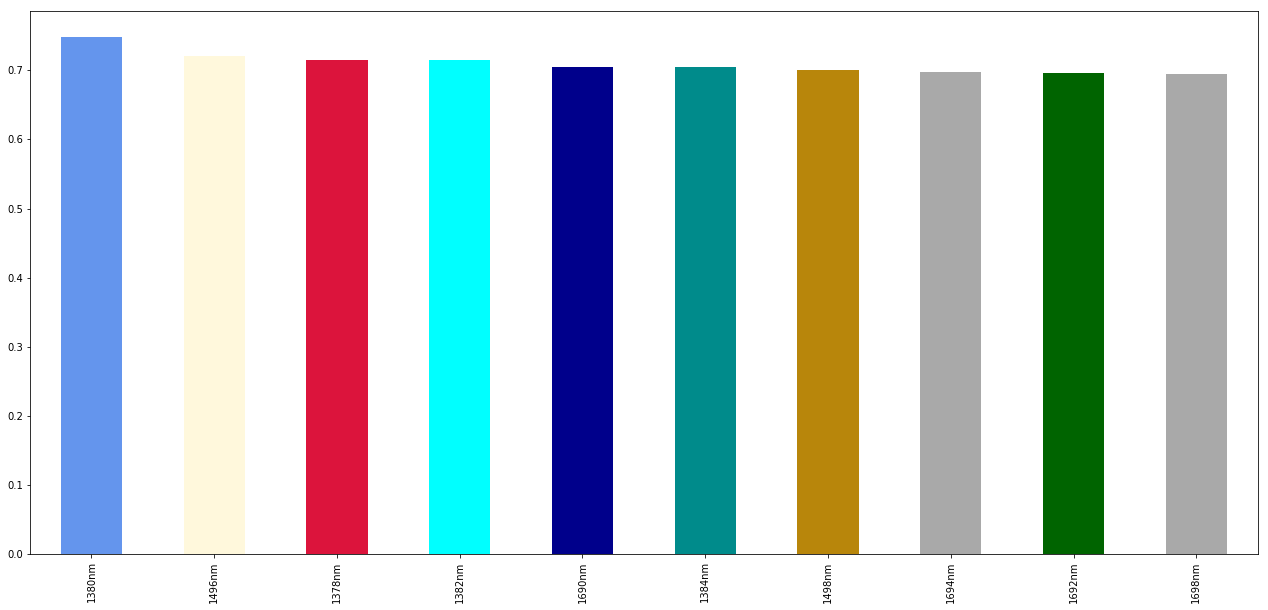

In [177]:
print('cmcase:')
sel_mi_graph[var_ae[1]][:10].plot.bar(figsize=(22,10),color=cores[25:35])
print('--------------------------------------')

In [20]:
print('Variáveis importantes para cmcase:')
sel_mi_graph[var_ae[1]][:]

Variáveis importantes para cmcase:


1206nm    0.982184
1208nm    0.958406
1516nm    0.957270
1204nm    0.939787
1518nm    0.937986
1196nm    0.937593
1138nm    0.936026
1210nm    0.935524
1514nm    0.931598
1696nm    0.913466
1274nm    0.912791
1198nm    0.910480
1520nm    0.910073
1136nm    0.902626
1194nm    0.900356
1202nm    0.899545
1182nm    0.897346
1502nm    0.893032
1506nm    0.890161
1694nm    0.886482
1272nm    0.885382
1276nm    0.884500
1134nm    0.882734
1508nm    0.881259
1184nm    0.881185
1200nm    0.880169
1522nm    0.879614
1132nm    0.877932
1142nm    0.876150
1504nm    0.875815
            ...   
2396nm    0.000000
2472nm    0.000000
2398nm    0.000000
2486nm    0.000000
2488nm    0.000000
2490nm    0.000000
1908nm    0.000000
1910nm    0.000000
1912nm    0.000000
2460nm    0.000000
2458nm    0.000000
2422nm    0.000000
2454nm    0.000000
1914nm    0.000000
2426nm    0.000000
2434nm    0.000000
1934nm    0.000000
1936nm    0.000000
1938nm    0.000000
2372nm    0.000000
1940nm    0.000000
1942nm    0.

In [21]:
print('Variáveis importantes para fpase:')
sel_mi_graph[var_ae[2]][:]

Variáveis importantes para fpase:


1488nm    0.673467
1380nm    0.665726
1500nm    0.664641
1546nm    0.651573
1544nm    0.646969
1498nm    0.639806
1378nm    0.639805
1382nm    0.632715
1490nm    0.632441
1548nm    0.631977
1502nm    0.627178
1376nm    0.627170
1542nm    0.625392
1492nm    0.624174
1562nm    0.620559
1550nm    0.619435
1412nm    0.614533
1560nm    0.614437
1540nm    0.613895
1558nm    0.611578
1664nm    0.608136
1816nm    0.606360
1818nm    0.605986
1532nm    0.603609
1384nm    0.601656
1854nm    0.600394
1552nm    0.598004
1386nm    0.597280
1530nm    0.597049
1850nm    0.596923
            ...   
1942nm    0.017669
1954nm    0.017500
1932nm    0.017393
1918nm    0.017149
1904nm    0.017003
1912nm    0.016976
1928nm    0.016190
1940nm    0.016102
2452nm    0.014818
1914nm    0.014709
1970nm    0.014274
1944nm    0.013905
1980nm    0.013718
1984nm    0.013316
1938nm    0.012746
2444nm    0.012597
1930nm    0.012471
1950nm    0.012059
1976nm    0.010014
1934nm    0.008466
1948nm    0.007658
1916nm    0.

In [22]:
print('Variáveis importantes para xilanase:')
sel_mi_graph[var_ae[3]][:]

Variáveis importantes para xilanase:


1672nm    0.717924
1674nm    0.713371
1648nm    0.703591
1676nm    0.699582
1670nm    0.694968
1386nm    0.693092
1666nm    0.682995
1650nm    0.680667
1628nm    0.679771
1384nm    0.679759
1408nm    0.679516
1620nm    0.677797
1678nm    0.673934
1668nm    0.673834
1654nm    0.673518
1490nm    0.666164
1652nm    0.665145
1630nm    0.664645
1640nm    0.659148
1638nm    0.658922
1106nm    0.657802
1410nm    0.656598
1488nm    0.656205
1646nm    0.656127
1642nm    0.655405
1114nm    0.653627
1626nm    0.652797
1388nm    0.652485
1382nm    0.652243
1406nm    0.652181
            ...   
1898nm    0.036933
1982nm    0.035611
2358nm    0.033965
1958nm    0.032588
1946nm    0.031490
1916nm    0.031146
1974nm    0.031033
1978nm    0.030890
1928nm    0.030102
2400nm    0.029224
1926nm    0.028172
1952nm    0.028170
2350nm    0.027252
1912nm    0.027217
2356nm    0.024615
1948nm    0.023702
1950nm    0.022749
1968nm    0.022177
2354nm    0.022069
1918nm    0.021468
1938nm    0.020733
1930nm    0.

In [178]:
sel_ = {}
for valor in var_ae:
    sel_[valor] = list(sel_mi_graph[valor].index)

In [179]:
sel_2 = []
for valor in var_ae:
    sel_2 += sel_[valor][:140]

In [180]:
#elimina repetições:
sel_2 = list(set(sel_2))

In [181]:
len(sel_2)
sel_2.sort()
print(sel_2)
len(sel_2)

['1146nm', '1148nm', '1156nm', '1158nm', '1172nm', '1176nm', '1294nm', '1296nm', '1298nm', '1300nm', '1302nm', '1304nm', '1306nm', '1308nm', '1310nm', '1312nm', '1326nm', '1328nm', '1338nm', '1340nm', '1342nm', '1344nm', '1346nm', '1348nm', '1350nm', '1352nm', '1354nm', '1356nm', '1358nm', '1360nm', '1362nm', '1364nm', '1366nm', '1368nm', '1370nm', '1372nm', '1374nm', '1376nm', '1378nm', '1380nm', '1382nm', '1384nm', '1386nm', '1388nm', '1390nm', '1392nm', '1394nm', '1396nm', '1398nm', '1400nm', '1402nm', '1404nm', '1406nm', '1408nm', '1410nm', '1412nm', '1414nm', '1416nm', '1418nm', '1420nm', '1422nm', '1424nm', '1426nm', '1428nm', '1430nm', '1432nm', '1466nm', '1468nm', '1470nm', '1472nm', '1474nm', '1476nm', '1478nm', '1480nm', '1482nm', '1484nm', '1486nm', '1488nm', '1490nm', '1492nm', '1494nm', '1496nm', '1498nm', '1500nm', '1502nm', '1504nm', '1506nm', '1508nm', '1510nm', '1512nm', '1514nm', '1516nm', '1518nm', '1520nm', '1522nm', '1524nm', '1526nm', '1528nm', '1530nm', '1532nm',

242

In [1]:
#Modificação da base de dados após seleção de atributos

{'betaglicosidase': 1108nm    0.999369
 1106nm    0.967521
 1112nm    0.963482
 1110nm    0.931531
 1114nm    0.918798
 1116nm    0.899837
 1104nm    0.892987
 1126nm    0.885621
 1102nm    0.858515
 1124nm    0.846853
 1424nm    0.839894
 1426nm    0.822176
 1422nm    0.800401
 1428nm    0.776295
 1118nm    0.770539
 1122nm    0.766036
 1100nm    0.761293
 1420nm    0.734736
 1352nm    0.729182
 1822nm    0.718661
 1120nm    0.717123
 1514nm    0.714210
 2046nm    0.712758
 1512nm    0.706361
 1776nm    0.696227
 1648nm    0.696111
 1150nm    0.691126
 1350nm    0.686032
 1664nm    0.685030
 1798nm    0.684768
             ...   
 1942nm    0.000000
 1938nm    0.000000
 1846nm    0.000000
 1848nm    0.000000
 1850nm    0.000000
 1852nm    0.000000
 1854nm    0.000000
 1856nm    0.000000
 1986nm    0.000000
 1990nm    0.000000
 1992nm    0.000000
 1994nm    0.000000
 2144nm    0.000000
 2142nm    0.000000
 2140nm    0.000000
 2138nm    0.000000
 1860nm    0.000000
 2130nm    0.000000
 

# seleção de variáveis:  SelectKBest 

In [25]:
var_ae=['betaglicosidase','cmcase','fpase','xilanase']
sel_sb={}
for valor in var_ae:
    sel_sb[valor] = SelectKBest(mutual_info_regression, k=200).fit(df_x,df_y.loc[:,valor])

In [26]:
sel_sb_graph = {}
for valor in var_ae:
    sel_sb_graph[valor] = pd.Series(sel_sb[valor])


In [27]:
var_selecionadas = {}
for valor in var_ae:
    var_selecionadas[valor] = list(df_x.columns[sel_sb[valor].get_support()])

In [28]:
#Seleciona os 100 atributos mais importantes para cada atividade
sel_100 = []
for valor in var_ae:
    sel_100 += var_selecionadas[valor][:100]

In [29]:
#elimina repetições:
sel_100 = list(set(sel_100))
len(sel_100)

In [30]:
sel_100.sort()
print(sel_100)

147

['1100nm', '1102nm', '1104nm', '1106nm', '1108nm', '1110nm', '1112nm', '1114nm', '1116nm', '1118nm', '1120nm', '1122nm', '1124nm', '1126nm', '1128nm', '1130nm', '1132nm', '1134nm', '1136nm', '1138nm', '1140nm', '1142nm', '1144nm', '1146nm', '1148nm', '1150nm', '1152nm', '1154nm', '1156nm', '1158nm', '1160nm', '1162nm', '1164nm', '1166nm', '1168nm', '1170nm', '1172nm', '1174nm', '1176nm', '1178nm', '1180nm', '1182nm', '1184nm', '1186nm', '1188nm', '1190nm', '1192nm', '1194nm', '1196nm', '1198nm', '1200nm', '1202nm', '1204nm', '1206nm', '1208nm', '1210nm', '1212nm', '1214nm', '1216nm', '1218nm', '1220nm', '1224nm', '1226nm', '1228nm', '1232nm', '1234nm', '1236nm', '1238nm', '1240nm', '1242nm', '1244nm', '1246nm', '1248nm', '1250nm', '1252nm', '1254nm', '1256nm', '1258nm', '1260nm', '1262nm', '1264nm', '1266nm', '1268nm', '1270nm', '1272nm', '1274nm', '1276nm', '1278nm', '1280nm', '1282nm', '1284nm', '1286nm', '1288nm', '1290nm', '1292nm', '1294nm', '1296nm', '1298nm', '1300nm', '1302nm',

In [33]:
#Seleciona os 310 atributos mais importantes para cada atividade
sel_310 = []
for valor in var_ae:
    sel_310 += var_selecionadas[valor][:310]

In [36]:
#elimina repetições:
sel_310 = list(set(sel_310))
len(sel_310)

298

In [39]:
sel_310.sort()
print(sel_310)

['1100nm', '1102nm', '1104nm', '1106nm', '1108nm', '1110nm', '1112nm', '1114nm', '1116nm', '1118nm', '1120nm', '1122nm', '1124nm', '1126nm', '1128nm', '1130nm', '1132nm', '1134nm', '1136nm', '1138nm', '1140nm', '1142nm', '1144nm', '1146nm', '1148nm', '1150nm', '1152nm', '1154nm', '1156nm', '1158nm', '1160nm', '1162nm', '1164nm', '1166nm', '1168nm', '1170nm', '1172nm', '1174nm', '1176nm', '1178nm', '1180nm', '1182nm', '1184nm', '1186nm', '1188nm', '1190nm', '1192nm', '1194nm', '1196nm', '1198nm', '1200nm', '1202nm', '1204nm', '1206nm', '1208nm', '1210nm', '1212nm', '1214nm', '1216nm', '1218nm', '1220nm', '1224nm', '1226nm', '1228nm', '1232nm', '1234nm', '1236nm', '1238nm', '1240nm', '1242nm', '1244nm', '1246nm', '1248nm', '1250nm', '1252nm', '1254nm', '1256nm', '1258nm', '1260nm', '1262nm', '1264nm', '1266nm', '1268nm', '1270nm', '1272nm', '1274nm', '1276nm', '1278nm', '1280nm', '1282nm', '1284nm', '1286nm', '1288nm', '1290nm', '1292nm', '1294nm', '1296nm', '1298nm', '1300nm', '1302nm',

In [61]:
#Seleciona os 200 atributos mais importantes para cada atividade
sel_ = []
for valor in var_ae:
    sel_ += var_selecionadas[valor][:140]

In [62]:
#elimina repetições:
sel_ = list(set(sel_))
len(sel_)

205

In [63]:
sel_.sort()
print(sel_)

['1100nm', '1102nm', '1104nm', '1106nm', '1108nm', '1110nm', '1112nm', '1114nm', '1116nm', '1118nm', '1120nm', '1122nm', '1124nm', '1126nm', '1128nm', '1130nm', '1132nm', '1134nm', '1136nm', '1138nm', '1140nm', '1142nm', '1144nm', '1146nm', '1148nm', '1150nm', '1152nm', '1154nm', '1156nm', '1158nm', '1160nm', '1162nm', '1164nm', '1166nm', '1168nm', '1170nm', '1172nm', '1174nm', '1176nm', '1178nm', '1180nm', '1182nm', '1184nm', '1186nm', '1188nm', '1190nm', '1192nm', '1194nm', '1196nm', '1198nm', '1200nm', '1202nm', '1204nm', '1206nm', '1208nm', '1210nm', '1212nm', '1214nm', '1216nm', '1218nm', '1220nm', '1224nm', '1226nm', '1228nm', '1232nm', '1234nm', '1236nm', '1238nm', '1240nm', '1242nm', '1244nm', '1246nm', '1248nm', '1250nm', '1252nm', '1254nm', '1256nm', '1258nm', '1260nm', '1262nm', '1264nm', '1266nm', '1268nm', '1270nm', '1272nm', '1274nm', '1276nm', '1278nm', '1280nm', '1282nm', '1284nm', '1286nm', '1288nm', '1290nm', '1292nm', '1294nm', '1296nm', '1298nm', '1300nm', '1302nm',